# Install  library from TestPypi repo [link here](https://test.pypi.org/project/neural-net-numpy/0.1.2/)
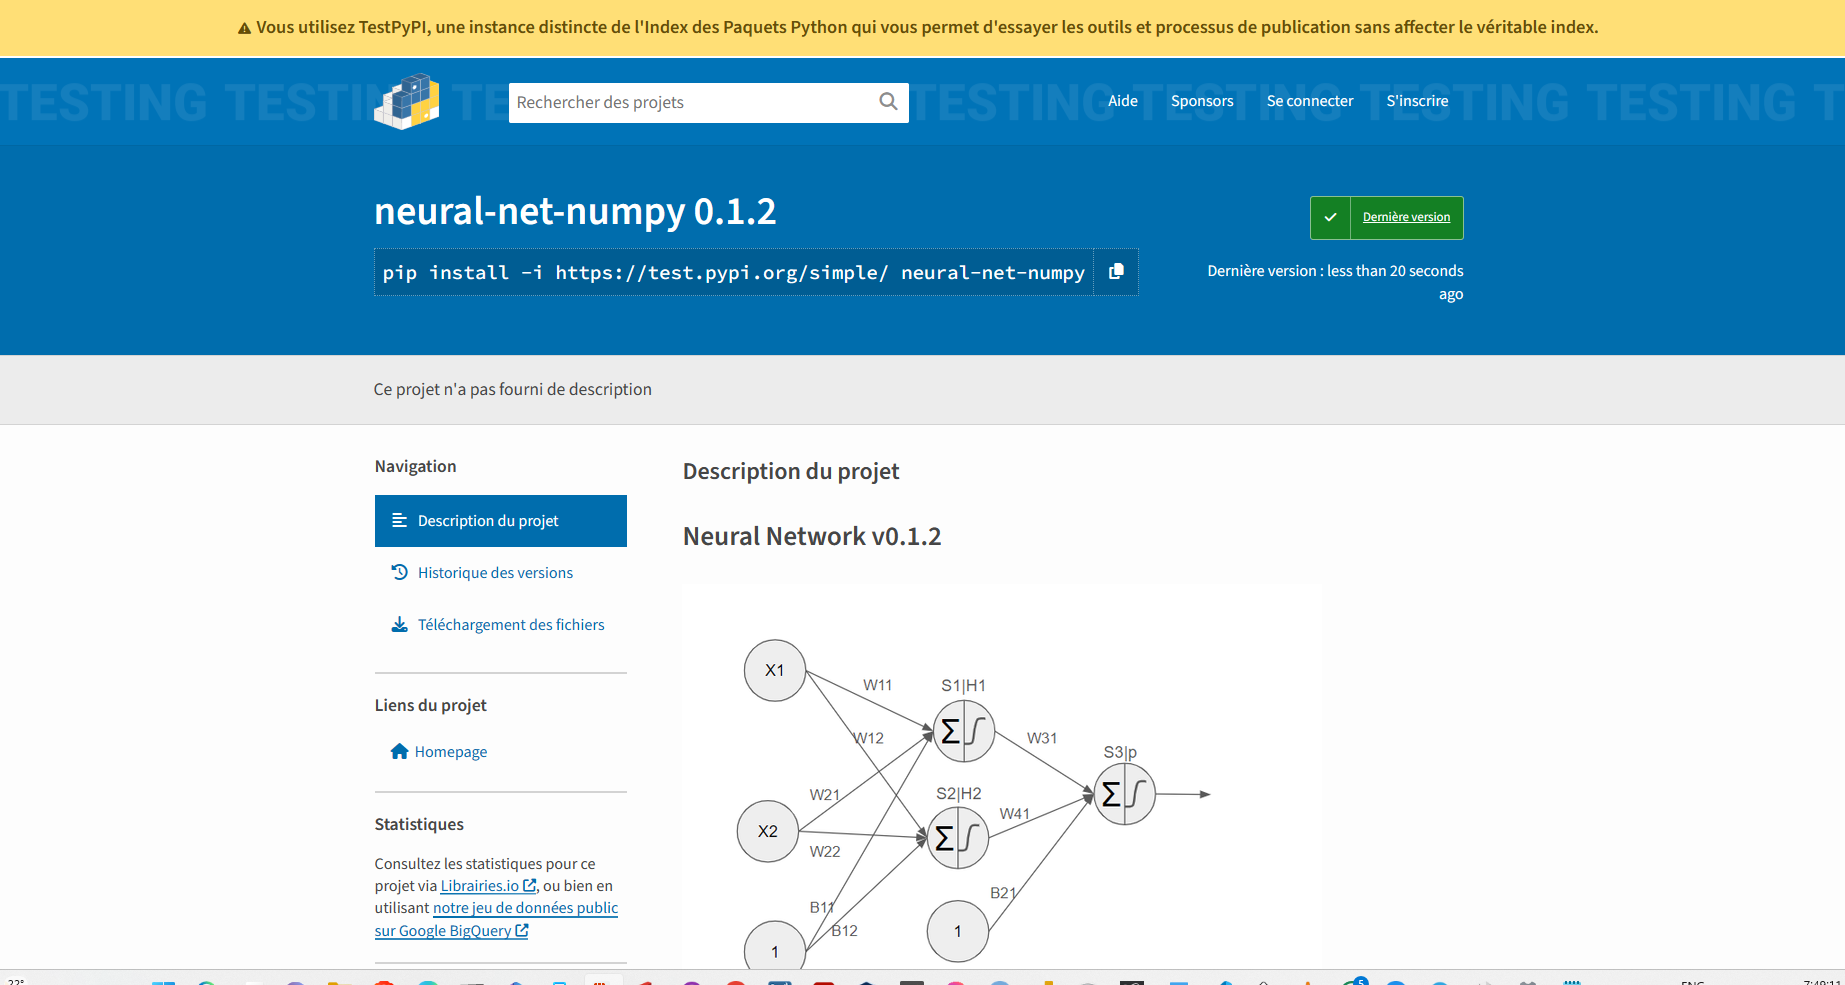

## Check python version (requirement python >=3.8)

In [1]:
!python --version

Python 3.11.7


In [17]:
!pip install --upgrade pip
!pip install -i https://test.pypi.org/simple/ neural-net-numpy==0.1.4

Looking in indexes: https://test.pypi.org/simple/


## Check install

In [18]:
!python -c "import neural_net;print(neural_net.__version__)"

0.1.0


# Import other libraries

* <a href="https://pandas.pydata.org/docs/index.html" target="_parent" >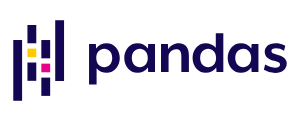</a> 
* <a href="https://pandas.pydata.org/docs/index.html" target="_parent" >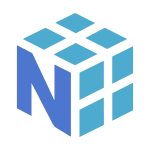</a>
* <a href="https://pandas.pydata.org/docs/index.html" target="_parent" >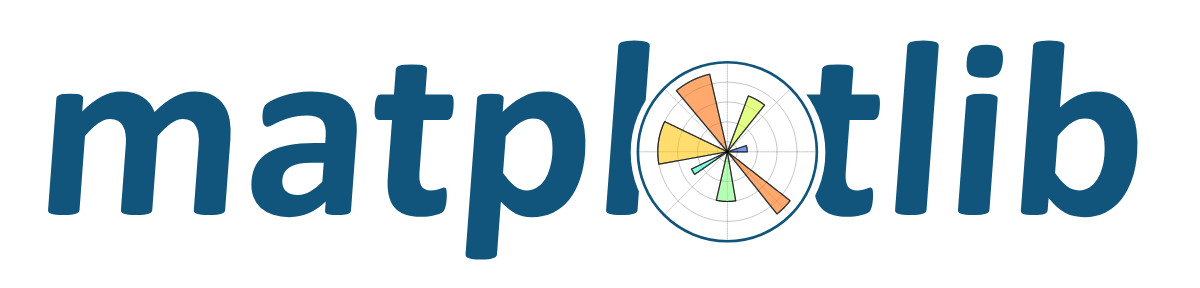</a>

In [46]:
import numpy,pandas
import matplotlib.pyplot as plt

# Activation functions

In [2]:
z = numpy.linspace(-6,6,1000+1)

## Sigmoid and Tanh

### Function values

In [3]:
from neural_net.activation import σ,Tanh

In [4]:
sigmoid = σ()
tanh    = Tanh()

In [5]:
sigmoid.compute(z)

array([0.00247262, 0.0025024 , 0.00253253, ..., 0.99746747, 0.9974976 ,
       0.99752738])

In [6]:
tanh.compute(z)

array([-1.99997542, -1.99997483, -1.99997421, ...,  1.99997421,
        1.99997483,  1.99997542])

In [7]:
sigmoid.preds

array([0.00247262, 0.0025024 , 0.00253253, ..., 0.99746747, 0.9974976 ,
       0.99752738])

In [8]:
tanh.preds

array([-1.99997542, -1.99997483, -1.99997421, ...,  1.99997421,
        1.99997483,  1.99997542])

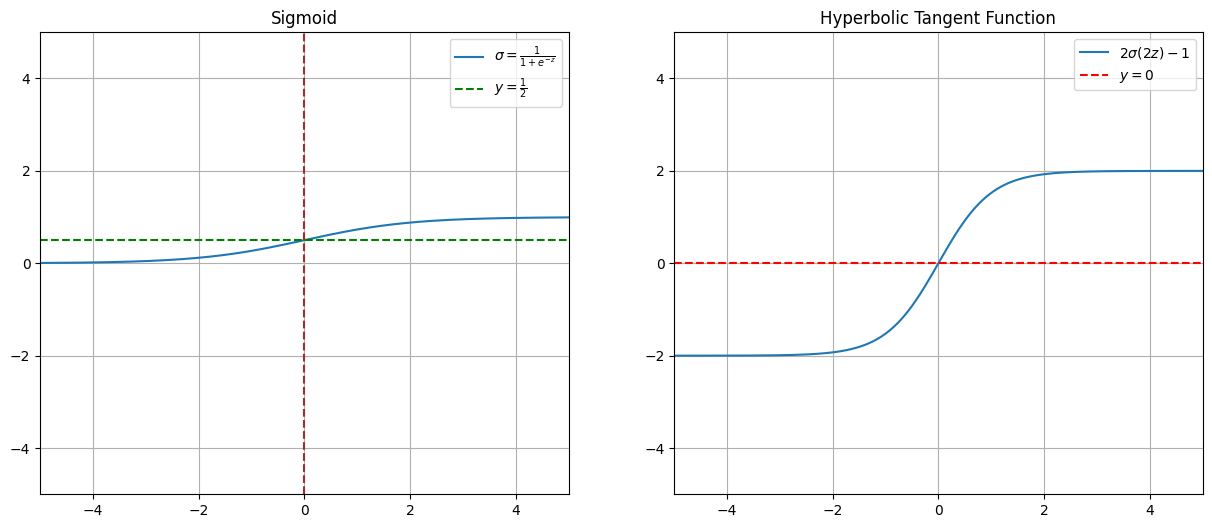

In [9]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(15,6))

ax1.plot(z,sigmoid.preds,label=r'$\sigma=\frac{1}{1+e^{-z}}$')
ax2.plot(z,tanh.preds,label='$2\sigma(2z) - 1$')

ax1.hlines(y=0.5,xmin=-5,xmax=5,color='green',label=r'$y=\frac{1}{2}$',linestyle='--')
ax1.vlines(x=0,ymin=-5,ymax=5,color='brown',linestyle='--')


ax2.hlines(y=0,xmin=-5,xmax=5,color='red',label=r'$y=0$',linestyle='--')

ax1.set_ylim(-5,5)
ax1.set_xlim(-5,5)
ax2.set_ylim(-5,5)
ax2.set_xlim(-5,5)

ax1.legend()
ax2.legend()

ax1.set_title('Sigmoid')
ax2.set_title('Hyperbolic Tangent Function')

ax1.grid()
ax2.grid()

### Derivatives

In [10]:
sigmoidpr = sigmoid.pr()

In [11]:
tanhpr = tanh.pr()

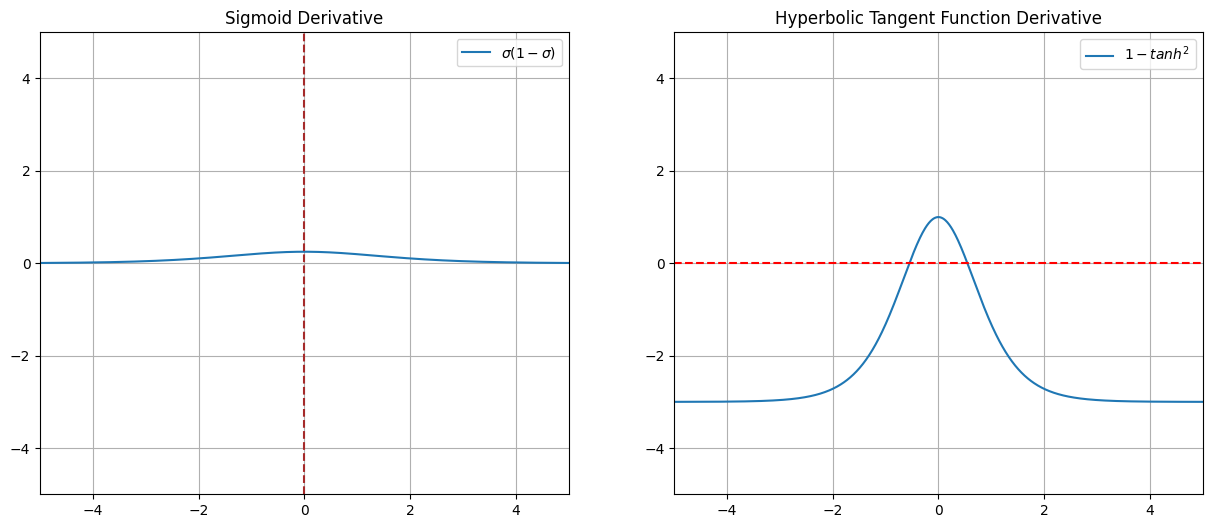

In [12]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(15,6))

ax1.plot(z,sigmoidpr,label=r'$\sigma(1-\sigma)$')
ax2.plot(z,tanhpr,label='$1 - tanh^2$')

ax1.hlines(y=0.25,xmin=65,xmax=5,color='green',linestyle='--')
ax1.vlines(x=0,ymin=-5,ymax=5,color='brown',linestyle='--')


ax2.hlines(y=0,xmin=-5,xmax=5,color='red',linestyle='--')

ax1.set_ylim(-5,5)
ax1.set_xlim(-5,5)
ax2.set_ylim(-5,5)
ax2.set_xlim(-5,5)

ax1.legend()
ax2.legend()

ax1.set_title('Sigmoid Derivative')
ax2.set_title('Hyperbolic Tangent Function Derivative')

ax1.grid()
ax2.grid()

## Rectified Linear Unit (ReLU)

### Function values
$$
    \mathrm{\mathit{H}}(z) = \begin{cases}
        z & \text{if } z \geq 0  \\ % & is your "\tab"
        0 & \text{if } z < 0
    \end{cases}
    $$

In [13]:
from neural_net.activation import ReLU

In [14]:
relu = ReLU()

In [15]:
relupred = relu.compute(z)
relupred

array([0.   , 0.   , 0.   , ..., 5.976, 5.988, 6.   ])

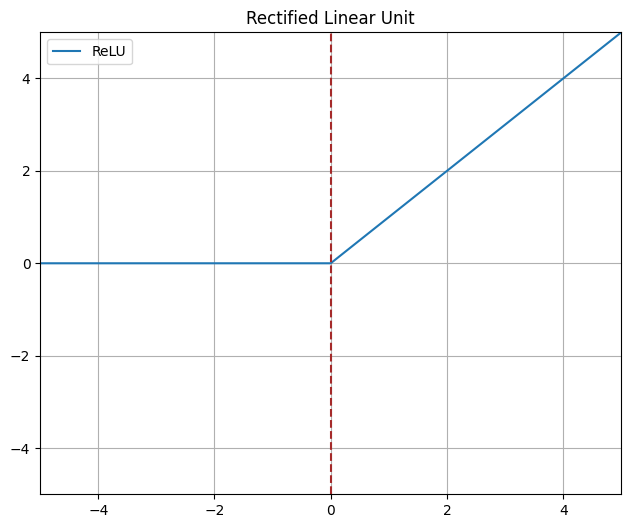

In [16]:
fig,ax1 = plt.subplots(nrows=1,ncols=1,figsize=(7.5,6))

ax1.plot(z,relupred,label=r'ReLU')

ax1.vlines(x=0,ymin=-5,ymax=5,color='brown',linestyle='--')



ax1.set_ylim(-5,5)
ax1.set_xlim(-5,5)
ax1.legend()

ax1.set_title('Rectified Linear Unit')

ax1.grid()

### Derivative

$$
\mathrm{\mathit{H}}(z) = \begin{cases}
1 & \text{if } z \geq 0  \\
0 & \text{if } z < 0
\end{cases}
$$

In [17]:
relupr = relu.pr()
relupr

array([0, 0, 0, ..., 1, 1, 1])

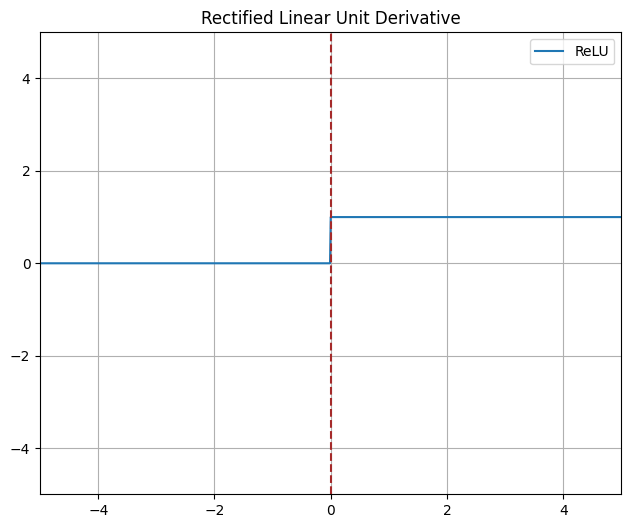

In [18]:
fig,ax1 = plt.subplots(nrows=1,ncols=1,figsize=(7.5,6))

ax1.plot(z,relupr,label=r'ReLU')

ax1.vlines(x=0,ymin=-5,ymax=5,color='brown',linestyle='--')



ax1.set_ylim(-5,5)
ax1.set_xlim(-5,5)

ax1.legend()

ax1.set_title('Rectified Linear Unit Derivative')

ax1.grid()

## Non Saturating activations

### Function values
- Leaky Rectified Linear Unit(Leaky ReLU)
$$
\mathrm{\mathit{H}}(z) = \begin{cases}
 z & \text{if }  z \geq 0  \\ 
 \alpha z & \text{if } z < 0
\end{cases}
$$

- Exponential Linear Unit(ELU)
$$
\mathrm{\mathit{H}}(z) = \begin{cases}
    z & \text{if } z \geq 0  \\ 
    \alpha (e^{z} - 1) & \text{if } z < 0
\end{cases}
$$

In [19]:
from neural_net.activation import ELU,LeakyReLU

In [20]:
elu = ELU(α=1)
leakyrelu = LeakyReLU(α=.1)

In [21]:
elupred,leakyrelupred = elu.compute(z),leakyrelu.compute(z)

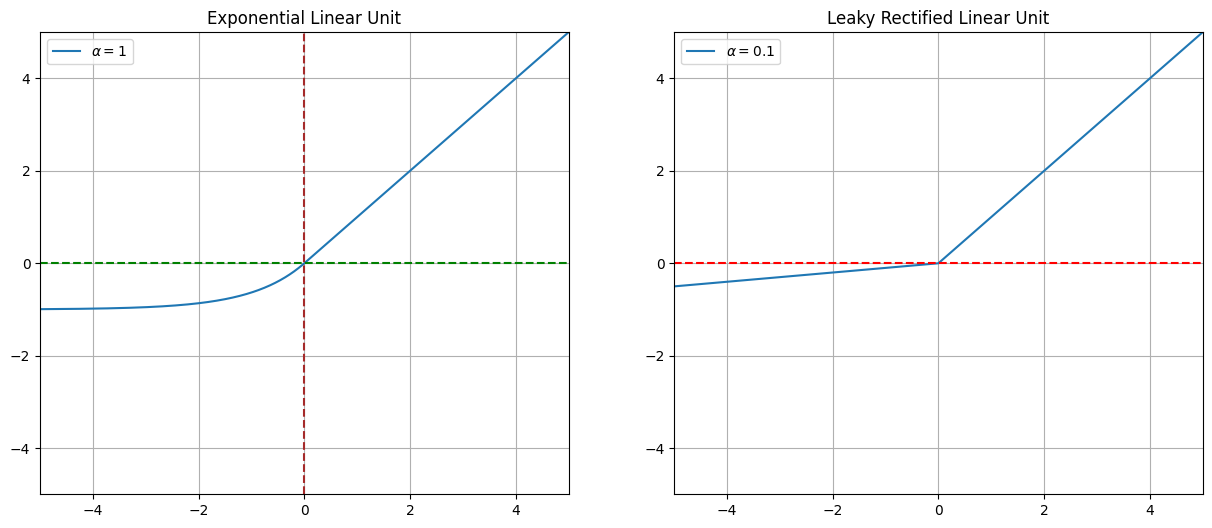

In [22]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(15,6))

ax1.plot(z,elupred,label=r'$\alpha=1$')
ax2.plot(z,leakyrelupred,label=r'$\alpha=0.1$')

ax1.hlines(y=0,xmin=-5,xmax=5,color='green',linestyle='--')
ax1.vlines(x=0,ymin=-5,ymax=5,color='brown',linestyle='--')


ax2.hlines(y=0,xmin=-5,xmax=5,color='red',linestyle='--')

ax1.set_ylim(-5,5)
ax1.set_xlim(-5,5)
ax2.set_ylim(-5,5)
ax2.set_xlim(-5,5)
ax1.legend()
ax2.legend()

ax1.set_title('Exponential Linear Unit')
ax2.set_title('Leaky Rectified Linear Unit')

ax1.grid()
ax2.grid()

### Derivatives
- ELU
$$
\mathrm{\mathit{H}}'(z) = \begin{cases}
 1 & \text{if } z \geq 0  \\ % &
  \mathrm{\mathit{H}}(z) + \alpha & \text{if } z < 0
  \end{cases}
$$ 
- Leaky ReLU
$$
\mathrm{\mathit{H}}'(z) = \begin{cases}
 1 & \text{if } z \geq 0  \\ % &
  \alpha & \text{if } z < 0
  \end{cases}
$$

In [23]:
elupr,leakypr = elu.pr(),leakyrelu.pr()

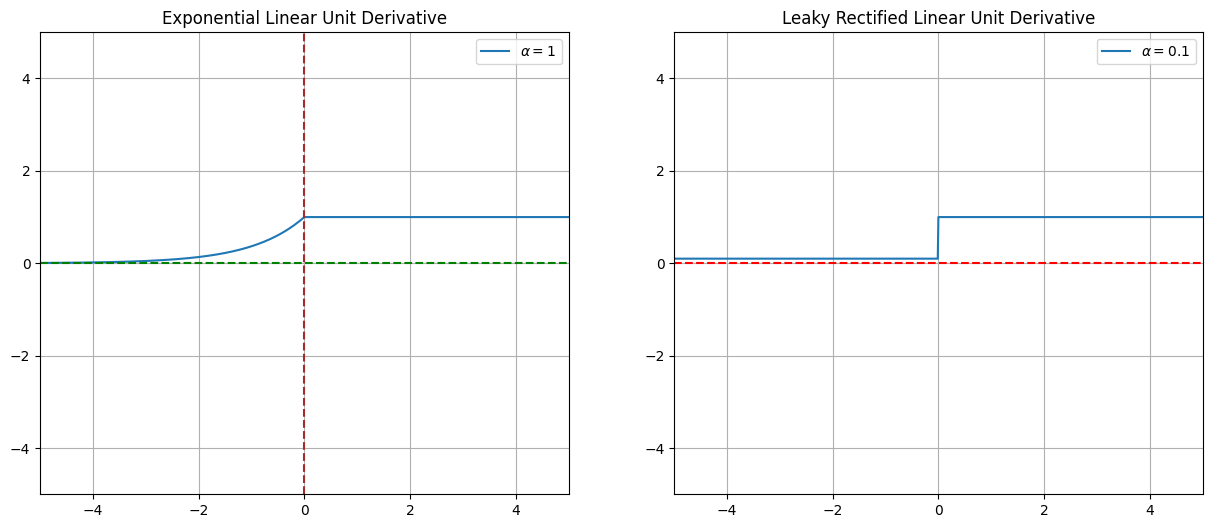

In [24]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(15,6))

ax1.plot(z,elupr,label=r'$\alpha=1$')
ax2.plot(z,leakypr,label=r'$\alpha=0.1$')

ax1.hlines(y=0,xmin=-5,xmax=5,color='green',linestyle='--')
ax1.vlines(x=0,ymin=-5,ymax=5,color='brown',linestyle='--')


ax2.hlines(y=0,xmin=-5,xmax=5,color='red',linestyle='--')

ax1.set_ylim(-5,5)
ax1.set_xlim(-5,5)
ax2.set_ylim(-5,5)
ax2.set_xlim(-5,5)
ax1.legend()
ax2.legend()

ax1.set_title('Exponential Linear Unit Derivative')
ax2.set_title('Leaky Rectified Linear Unit Derivative')

ax1.grid()
ax2.grid()

## All common activation function and their derivatives

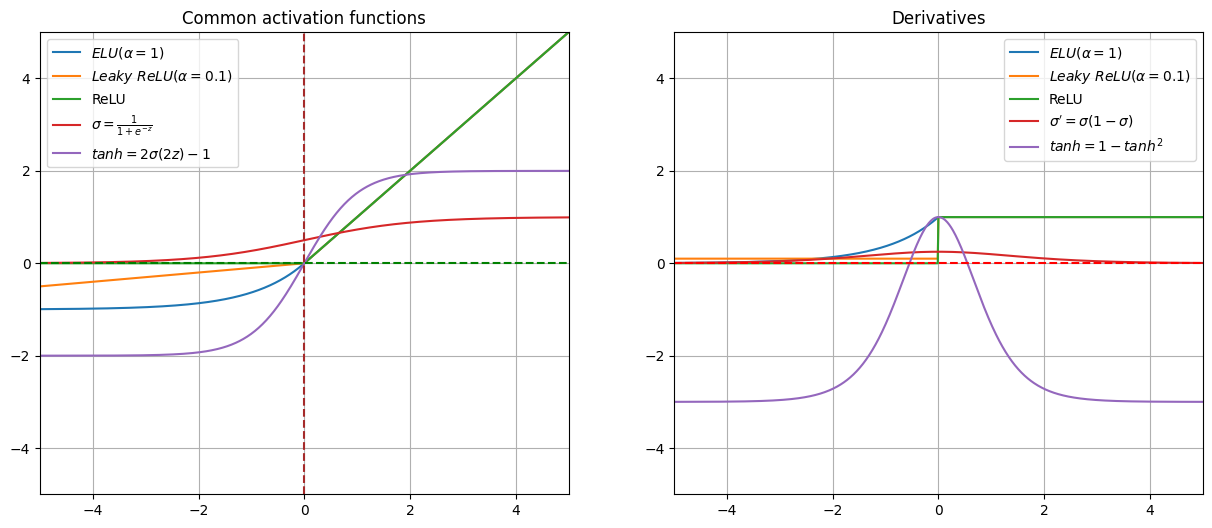

In [25]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(15,6))

ax1.plot(z,elu.preds,label=r'$ELU(\alpha=1)$')
ax1.plot(z,leakyrelu.preds,label=r'$Leaky\ ReLU(\alpha=0.1)$')
ax1.plot(z,relu.preds,label=r'ReLU')
ax1.plot(z,sigmoid.preds,label=r'$\sigma=\frac{1}{1+e^{-z}}$')
ax1.plot(z,tanh.preds,label='$tanh=2\sigma(2z) - 1$')


ax2.plot(z,elupr,label=r'$ELU(\alpha=1)$')
ax2.plot(z,leakypr,label=r'$Leaky\ ReLU(\alpha=0.1$)')
ax2.plot(z,relupr,label=r'ReLU')
ax2.plot(z,sigmoidpr,label=r"$\sigma'=\sigma(1-\sigma)$")
ax2.plot(z,tanhpr,label='$tanh=1 - tanh^2$')

ax1.hlines(y=0,xmin=-5,xmax=5,color='green',linestyle='--')
ax1.vlines(x=0,ymin=-5,ymax=5,color='brown',linestyle='--')


ax2.hlines(y=0,xmin=-5,xmax=5,color='red',linestyle='--')

ax1.set_ylim(-5,5)
ax1.set_xlim(-5,5)
ax2.set_ylim(-5,5)
ax2.set_xlim(-5,5)
ax1.legend()
ax2.legend()

ax1.set_title('Common activation functions')
ax2.set_title('Derivatives')

ax1.grid()
ax2.grid()

# Initialization

In [26]:
from neural_net.init_funcs import XavierHe, zeros

## Weights + Bias

In [34]:
n_cols = 2

### Zeros

In [35]:
W = zeros(n_cols,1)
W

array([[0.],
       [0.],
       [0.]])

In [36]:
W = zeros(n_cols,1,biais=False)
W

array([[0.],
       [0.]])

## Xavier and He

<a href="https://imgbb.com/"><img src="https://i.ibb.co/FHwxjmL/Screenshot-2024-03-03-084231.png" alt="Screenshot-2024-03-03-084231" border="0"></a>


In [37]:
initializer = XavierHe("Normal","Sigmoid").init_func

In [38]:
initializer(n_cols,1)

array([[ 1.08529782],
       [ 0.55315106],
       [-1.20349346]])

In [39]:
initializer(n_cols,1,biais=False)

array([[0.14914699],
       [0.68662846]])

### Normal distribution

In [105]:
n_cols = 1000

In [106]:
xe_norm_sigmoid = XavierHe("Normal","Sigmoid").init_func(n_cols,1,biais=False)
xe_norm_tanh = XavierHe("Normal","Tanh").init_func(n_cols,1,biais=False)
xe_norm_relu = XavierHe("Normal","ReLU").init_func(n_cols,1,biais=False)


In [107]:
xe_norm_sigmoid.shape

(1000, 1)

In [108]:
std,m = xe_norm_sigmoid.std(),xe_norm_sigmoid.mean()
std,m

(0.04489498522857033, -0.0007231213204853488)

In [109]:
(( xe_norm_sigmoid >= m-std) & (xe_norm_sigmoid<=m+std)).sum()

697

In [113]:
697/n_cols

0.697

In [114]:
(( xe_norm_sigmoid >= m-2*std) & (xe_norm_sigmoid<=m+2*std)).sum()/n_cols

0.95

In [115]:
(( xe_norm_sigmoid >= m-3*std) & (xe_norm_sigmoid<=m+3*std)).sum()/n_cols

0.997

In [116]:
xe_norm_tanh.std(),xe_norm_relu.std()

(0.1711681672411125, 0.06410140383405528)

(-0.726385463544662, 0.6217518101350396, 0.0, 111.3)

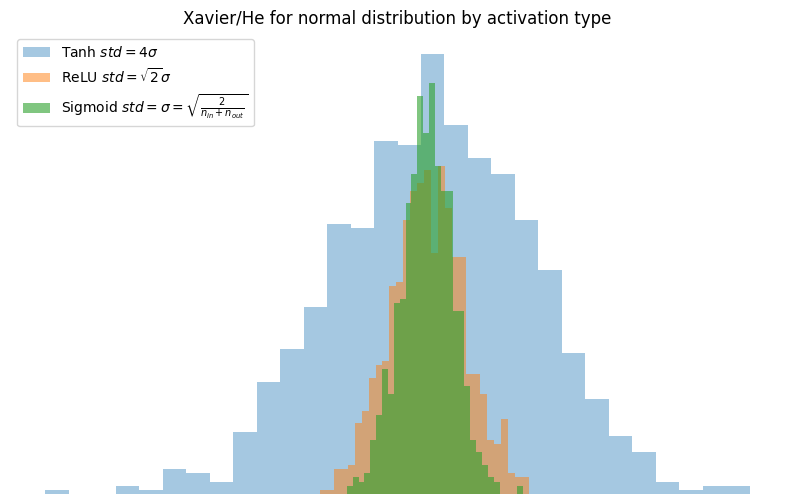

In [130]:
plt.figure(figsize=(10,6))

plt.title('Xavier/He for normal distribution by activation type')
plt.hist(xe_norm_tanh,label=r'Tanh $std=4\sigma$',bins=30,alpha=.4)
plt.hist(xe_norm_relu,label=r'ReLU $std=\sqrt{2}\sigma$',bins=30,alpha=.5)
plt.hist(xe_norm_sigmoid,label=r'Sigmoid $std=\sigma=\sqrt{\frac{2}{n_{in}+n_{out}}}$',bins=30,alpha=.6)

plt.legend(loc='upper left')
plt.axis('off')

### Uniform distribution

In [128]:
xe_uni_sigmoid = XavierHe("Uniform","Sigmoid").init_func(n_cols,1,biais=False)
xe_uni_tanh = XavierHe("Uniform","Tanh").init_func(n_cols,1,biais=False)
xe_uni_relu = XavierHe("Uniform","ReLU").init_func(n_cols,1,biais=False)


In [135]:
xe_uni_sigmoid.min()

-0.07708092487365578

In [136]:
xe_uni_sigmoid.max()

0.0770798990273792

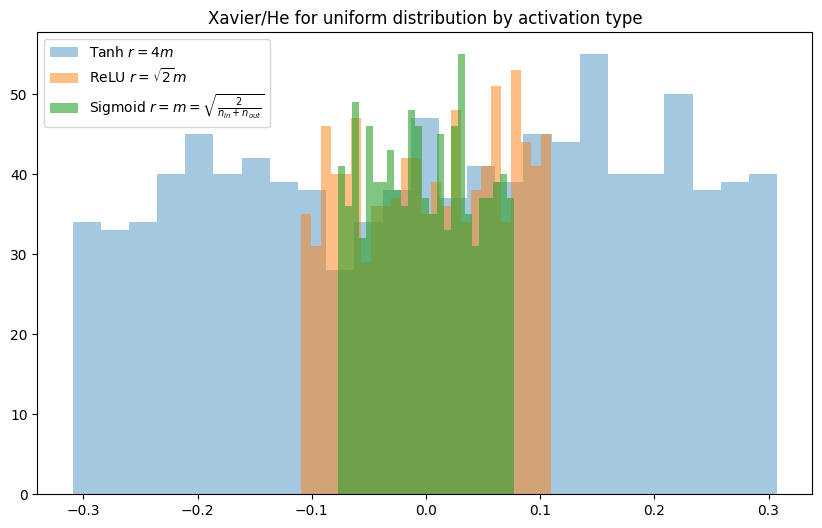

In [140]:
plt.figure(figsize=(10,6))

plt.title('Xavier/He for uniform distribution by activation type')
plt.hist(xe_uni_tanh,label=r'Tanh $r=4m$',bins=25,alpha=.4)
plt.hist(xe_uni_relu,label=r'ReLU $r=\sqrt{2}m$',bins=25,alpha=.5)
plt.hist(xe_uni_sigmoid,label=r'Sigmoid $r=m=\sqrt{\frac{2}{n_{in}+n_{out}}}$',bins=25,alpha=.6)

plt.legend(loc='upper left')


# Layers

In [142]:
from neural_net.layers import Fullyconnected,Activation


## Linear Layer

In [158]:
fc = Fullyconnected(n_in=2,n_out=1,init_method=zeros)

In [159]:
repr(fc)

'Fullyconnected'

In [160]:
str(fc)

'Layer'

In [161]:
fc.id

{'id': 140377909934032,
 'Layer_id': 140377909934032,
 'name': 'Fullyconnected',
 'self': Fullyconnected,
 'n_in': 2,
 'n_out': 1,
 'init_method': <function neural_net.init_funcs.zeros(n_in: int, n_out: int, biais: bool = True) -> <built-in function array>>,
 'func': neural_net.activation.Σ,
 'steps': []}

In [162]:
fc['id']

140377909934032

In [163]:
fc.id['id']

140377909934032

In [164]:
fc.func

Σ

## Linear activation

In [166]:
linear_activation = fc.func
linear_activation

Σ

In [167]:
str(linear_activation)

'Neurons'

In [168]:
repr(linear_activation)

'Σ'

In [169]:
linear_activation.id

{'id': 140377909866128,
 'Neurons_id': 140377909866128,
 'name': 'Σ',
 'self': Σ,
 'Layer_id': 140377909934032,
 'Layer_Layer_id': 140377909934032,
 'Layer_name': 'Fullyconnected',
 'Layer_self': Fullyconnected,
 'Layer_n_in': 2,
 'Layer_n_out': 1,
 'Layer_init_method': <function neural_net.init_funcs.zeros(n_in: int, n_out: int, biais: bool = True) -> <built-in function array>>,
 'Layer_func': neural_net.activation.Σ,
 'steps': []}

In [170]:
linear_activation.W

array([[0.],
       [0.],
       [0.]])

In [171]:
linear_activation.W.shape

(3, 1)

## activation layer

In [172]:
sigmoid_activation = Activation(func=σ)

In [173]:
sigmoid_activation

Activation

In [174]:
str(sigmoid_activation)

'Layer'

In [175]:
sigmoid_activation.id

{'id': 140377909680656,
 'Layer_id': 140377909680656,
 'name': 'Activation',
 'self': Activation,
 'func': neural_net.activation.σ,
 'kargs': (),
 'steps': []}

# Architecture

In [1]:
from neural_net.architecture import Sequential
from neural_net.layers import Fullyconnected,Activation
from neural_net.init_funcs import zeros
from neural_net.activation import σ
from neural_net.cost import BinaryCrossEntropy

In [2]:
network = Sequential(
        [
        Fullyconnected(2,10,zeros),
        Activation(σ),
        Fullyconnected(10,1,zeros),
        Activation(σ)
        ]
    ,BinaryCrossEntropy)

In [3]:
repr(network)

'Sequential'

In [4]:
str(network)

'Architecture'

In [5]:
help(network)

Help on Sequential in module neural_net.architecture object:

class Sequential(neural_net.model.Architecture)
 |  Sequential(steps: list[neural_net.model.Layer], cost: neural_net.model.Cost, store: bool = False) -> None
 |  
 |  Method resolution order:
 |      Sequential
 |      neural_net.model.Architecture
 |      neural_net.model.Define
 |      neural_net.db.DBmanager
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, steps: list[neural_net.model.Layer], cost: neural_net.model.Cost, store: bool = False) -> None
 |      Initialize a Sequential class.
 |      
 |      Args:
 |          steps (List[Layer]): A list of Layer objects representing the steps.
 |          cost (Cost): A Cost object for computing cost information.
 |          store (bool): If True disables identification and storage
 |      
 |      Example:
 |      ```python
 |              layer1 = Fullyconnected(2,50,init_funcs.zeros)
 |              layer2 = Activation(activation.LeakyReLU)
 |

In [6]:
network['steps']

[Fullyconnected, Activation, Fullyconnected, Activation]

In [7]:
network.id.keys()

dict_keys(['id', 'Architecture_id', 'name', 'self', 'steps', 'cost', 'store'])

In [8]:
network['id']

140379602988880

In [9]:
network.id['id']

140379602988880

# Adding Database

In [13]:
network = Sequential(
        [
        Fullyconnected(2,50,zeros),
        Activation(σ),
        Fullyconnected(50,2,zeros),
        Activation(σ)
        ]
    ,BinaryCrossEntropy,store=True)

In [14]:
network.session

In [15]:
network.db_path

'sqlite:////home/analyst/notebooks/module/neural_net/run/model1709575905.db'

In [21]:
utc_ts = network.db_path.split('/')[-1][5:-3]
utc_ts

'1709575905'

In [20]:
import datetime

In [24]:
datetime.datetime.fromtimestamp(int(utc_ts)).isoformat()

'2024-03-04T18:11:45'

In [31]:
db_folder = '/'.join(network.db_path.split('/')[3:-1])
db_folder

'/home/analyst/notebooks/module/neural_net/run'

In [32]:
%ls  $db_folder/*db|tail -n 3

/home/analyst/notebooks/module/neural_net/run/model1709575470.db
/home/analyst/notebooks/module/neural_net/run/model1709575647.db
/home/analyst/notebooks/module/neural_net/run/model1709575905.db


In [37]:
network.engines

{'sqlite:////home/analyst/notebooks/module/neural_net/run/model1709575905.db': Engine(sqlite:////home/analyst/notebooks/module/neural_net/run/model1709575905.db)}

In [38]:
network.engines.get(network.db_path)

Engine(sqlite:////home/analyst/notebooks/module/neural_net/run/model1709575905.db)

In [43]:
cursor = network.engines.get(network.db_path).connect()

In [44]:
from sqlalchemy import text

In [48]:
res = cursor.execute(text('''

        SELECT * 
        FROM
        sqlite_schema

'''))
pandas.DataFrame(res.fetchall())

,type,name,tbl_name,rootpage,sql
0,table,Architecture,Architecture,2,"CREATE TABLE ""Architecture"" (\n\tid INTEGER NO..."
1,table,Layer,Layer,3,"CREATE TABLE ""Layer"" (\n\t""Architecture_id"" IN..."
2,table,Cost,Cost,4,"CREATE TABLE ""Cost"" (\n\t""Architecture_id"" INT..."
3,table,Neurons,Neurons,5,"CREATE TABLE ""Neurons"" (\n\t""Layer_id"" INTEGER..."
4,table,Weight,Weight,6,"CREATE TABLE ""Weight"" (\n\tvalue INTEGER, \n\t..."


# Generating Linearly seperable data

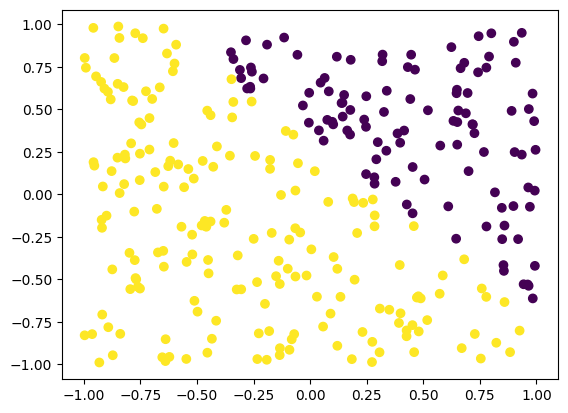

In [2]:
n,k = 300,2
X = numpy.random.uniform(-100,1,size=(n,k))
y = (X.sum(axis=1) < numpy.random.uniform(.3,.37,(len(X),))).reshape(-1,1)+0
plt.scatter(x=X[:,0],y=X[:,1],c=y)


# Feeding data to network

## Linear Layer

In [66]:
network.steps[0]

### Feeding data to input layer 
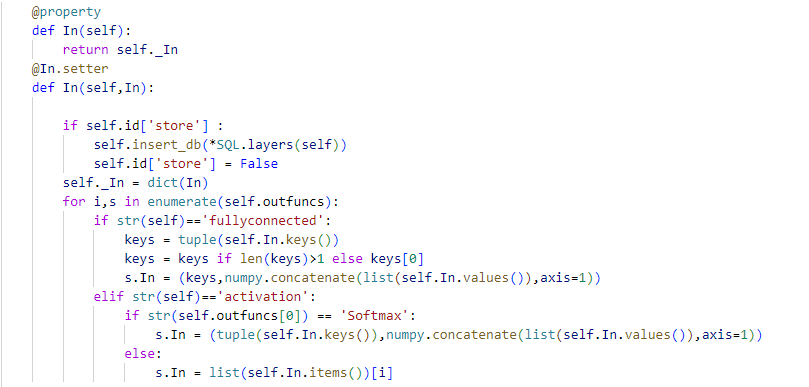

In [69]:
network.steps[0].In = [(id(X),X)]

In [70]:
network.steps[0].In

{139944190970448: array([[ 0.81240966, -0.98502053],
        [-0.65753166, -0.71539208],
        [-0.69048285,  0.76926017],
        [ 0.89645497, -0.61843849],
        [-0.84739248, -0.55936477],
        [ 0.94843189, -0.95846284],
        [-0.6494695 , -0.42237674],
        [ 0.78877238,  0.95374365],
        [-0.14948672, -0.56587301],
        [ 0.49599788, -0.10720521],
        [-0.51232288, -0.55700035],
        [ 0.89498427,  0.55804353],
        [ 0.89139858, -0.87105231],
        [ 0.27459886,  0.24328005],
        [-0.22823551, -0.90545628],
        [ 0.7443853 , -0.61632639],
        [ 0.04655311, -0.27833713],
        [-0.18431923,  0.16272681],
        [-0.61772498, -0.19911441],
        [-0.66135908, -0.40382288],
        [-0.86561536,  0.17245137],
        [ 0.05308082, -0.55389988],
        [-0.08180537, -0.06501783],
        [ 0.28829356,  0.08119485],
        [ 0.81143322,  0.7471888 ],
        [ 0.85777076,  0.56236438],
        [ 0.34660357,  0.84689819],
        [ 0

In [71]:
network.steps[0].outfuncs

In [72]:
network.steps[0].outfuncs[0]

In [73]:
network.steps[0].outfuncs[0].In

(139944190970448,
 array([[ 0.81240966, -0.98502053],
        [-0.65753166, -0.71539208],
        [-0.69048285,  0.76926017],
        [ 0.89645497, -0.61843849],
        [-0.84739248, -0.55936477],
        [ 0.94843189, -0.95846284],
        [-0.6494695 , -0.42237674],
        [ 0.78877238,  0.95374365],
        [-0.14948672, -0.56587301],
        [ 0.49599788, -0.10720521],
        [-0.51232288, -0.55700035],
        [ 0.89498427,  0.55804353],
        [ 0.89139858, -0.87105231],
        [ 0.27459886,  0.24328005],
        [-0.22823551, -0.90545628],
        [ 0.7443853 , -0.61632639],
        [ 0.04655311, -0.27833713],
        [-0.18431923,  0.16272681],
        [-0.61772498, -0.19911441],
        [-0.66135908, -0.40382288],
        [-0.86561536,  0.17245137],
        [ 0.05308082, -0.55389988],
        [-0.08180537, -0.06501783],
        [ 0.28829356,  0.08119485],
        [ 0.81143322,  0.7471888 ],
        [ 0.85777076,  0.56236438],
        [ 0.34660357,  0.84689819],
        [ 

### Db layers

In [74]:
%pwd

'/home/analyst/notebooks'

In [76]:
%load_ext sql
%sql sqlite:///$network.db_path

In [77]:
%%sql   

SELECT * 
FROM layers

 * sqlite:////home/analyst/notebooks/neural_net/run/model20240223130131.db
   sqlite:///network.db_path
Done.


id,layer_id,n_out,created_at,updated_at,type
1,139944266460176,10,2024-02-23 13:02:33,2024-02-23 13:02:33,fullyconnected


### Neurons

In [78]:
%%sql

SELECT * 
        FROM
        neurons


 * sqlite:////home/analyst/notebooks/neural_net/run/model20240223130131.db
   sqlite:///network.db_path
Done.


id,neuron_id,n_in,layer_id,created_at,updated_at,type
1,139944266525968,2,139944266460176,2024-02-23 13:02:33,2024-02-23 13:02:33,Linear
2,139944266482704,2,139944266460176,2024-02-23 13:02:33,2024-02-23 13:02:33,Linear
3,139944190815824,2,139944266460176,2024-02-23 13:02:33,2024-02-23 13:02:33,Linear
4,139944190815952,2,139944266460176,2024-02-23 13:02:33,2024-02-23 13:02:33,Linear
5,139944190815888,2,139944266460176,2024-02-23 13:02:33,2024-02-23 13:02:33,Linear
6,139944190815696,2,139944266460176,2024-02-23 13:02:33,2024-02-23 13:02:33,Linear
7,139944190816528,2,139944266460176,2024-02-23 13:02:33,2024-02-23 13:02:33,Linear
8,139944190815632,2,139944266460176,2024-02-23 13:02:33,2024-02-23 13:02:33,Linear
9,139944190804880,2,139944266460176,2024-02-23 13:02:33,2024-02-23 13:02:33,Linear
10,139944190815440,2,139944266460176,2024-02-23 13:02:33,2024-02-23 13:02:33,Linear


### Weights

In [79]:
%%sql

SELECT * 
FROM
weights


 * sqlite:////home/analyst/notebooks/neural_net/run/model20240223130131.db
   sqlite:///network.db_path
Done.


id,weight_id,neuron_id,created_at,updated_at,value
1,0,139944266525968,2024-02-23 13:02:33,2024-02-23 13:02:33,0.0
2,1,139944266525968,2024-02-23 13:02:33,2024-02-23 13:02:33,0.0
3,2,139944266525968,2024-02-23 13:02:33,2024-02-23 13:02:33,0.0
4,0,139944266482704,2024-02-23 13:02:33,2024-02-23 13:02:33,0.0
5,1,139944266482704,2024-02-23 13:02:33,2024-02-23 13:02:33,0.0
6,2,139944266482704,2024-02-23 13:02:33,2024-02-23 13:02:33,0.0
7,0,139944190815824,2024-02-23 13:02:33,2024-02-23 13:02:33,0.0
8,1,139944190815824,2024-02-23 13:02:33,2024-02-23 13:02:33,0.0
9,2,139944190815824,2024-02-23 13:02:33,2024-02-23 13:02:33,0.0
10,0,139944190815952,2024-02-23 13:02:33,2024-02-23 13:02:33,0.0


### Predictions

In [80]:
len(network.steps[0].eval())

10

In [81]:
network.steps[0].out[0][1].shape

(100, 1)

## Activation Layer

In [82]:
network.steps[1].In = network.steps[0].out

In [83]:
%%sql
SELECT * from layers

 * sqlite:////home/analyst/notebooks/neural_net/run/model20240223130131.db
   sqlite:///network.db_path
Done.


id,layer_id,n_out,created_at,updated_at,type
1,139944266460176,10,2024-02-23 13:02:33,2024-02-23 13:02:33,fullyconnected
2,139944190814480,10,2024-02-23 13:05:42,2024-02-23 13:05:42,activation


In [84]:
len(network.steps[1].In)

10

In [85]:
network.steps[1].outfuncs

In [86]:
network.steps[1].outfuncs[0]

In [87]:
network.steps[1].outfuncs[0].In

(139944190981392,
 array([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
  

In [88]:
network.steps[1].outfuncs[0].In[1].shape

(100, 1)

In [89]:
len(network.steps[1])

10

In [90]:
len(network.steps[1].eval())

10

In [91]:
%%sql 
Select * from neurons where type='sigmoid'

 * sqlite:////home/analyst/notebooks/neural_net/run/model20240223130131.db
   sqlite:///network.db_path
Done.


id,neuron_id,n_in,layer_id,created_at,updated_at,type
11,139944190814544,1,139944190814480,2024-02-23 13:05:42,2024-02-23 13:05:42,sigmoid
12,139944267700112,1,139944190814480,2024-02-23 13:05:42,2024-02-23 13:05:42,sigmoid
13,139944190814160,1,139944190814480,2024-02-23 13:05:42,2024-02-23 13:05:42,sigmoid
14,139944190813968,1,139944190814480,2024-02-23 13:05:42,2024-02-23 13:05:42,sigmoid
15,139944190817936,1,139944190814480,2024-02-23 13:05:42,2024-02-23 13:05:42,sigmoid
16,139944190818128,1,139944190814480,2024-02-23 13:05:42,2024-02-23 13:05:42,sigmoid
17,139944190818576,1,139944190814480,2024-02-23 13:05:42,2024-02-23 13:05:42,sigmoid
18,139944190818832,1,139944190814480,2024-02-23 13:05:42,2024-02-23 13:05:42,sigmoid
19,139944190818960,1,139944190814480,2024-02-23 13:05:42,2024-02-23 13:05:42,sigmoid
20,139944190818064,1,139944190814480,2024-02-23 13:05:42,2024-02-23 13:05:42,sigmoid


In [92]:
%%sql
Select count(*) as nb_weights from weights 

 * sqlite:////home/analyst/notebooks/neural_net/run/model20240223130131.db
   sqlite:///network.db_path
Done.


nb_weights
30


In [93]:
network.steps[1].outfuncs[0].eval()

(139944191004656,
 array([[0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
       

In [94]:
len(network.steps[1].out)

10

## Second Linear Layer

In [95]:
network.steps[2].In = network.steps[1].out

In [96]:
len(network.steps[2].In)

10

In [97]:
network.steps[2].outfuncs

In [98]:
%%sql

SELECT * 
FROM
layers


 * sqlite:////home/analyst/notebooks/neural_net/run/model20240223130131.db
   sqlite:///network.db_path
Done.


id,layer_id,n_out,created_at,updated_at,type
1,139944266460176,10,2024-02-23 13:02:33,2024-02-23 13:02:33,fullyconnected
2,139944190814480,10,2024-02-23 13:05:42,2024-02-23 13:05:42,activation
3,139944190819152,1,2024-02-23 13:06:03,2024-02-23 13:06:03,fullyconnected


In [99]:
network.steps[2].outfuncs[0].In[1].shape

(100, 10)

In [100]:
len(network.steps[2].eval())

1

In [102]:
%%sql
SELECT * from neurons where layer_id = 139944190819152

 * sqlite:////home/analyst/notebooks/neural_net/run/model20240223130131.db
   sqlite:///network.db_path
Done.


id,neuron_id,n_in,layer_id,created_at,updated_at,type
21,139944190819216,10,139944190819152,2024-02-23 13:06:03,2024-02-23 13:06:03,Linear


In [103]:
%%sql
SELECT * from weights where neuron_id = 139944190819216

 * sqlite:////home/analyst/notebooks/neural_net/run/model20240223130131.db
   sqlite:///network.db_path
Done.


id,weight_id,neuron_id,created_at,updated_at,value
31,0,139944190819216,2024-02-23 13:06:03,2024-02-23 13:06:03,0.0
32,1,139944190819216,2024-02-23 13:06:03,2024-02-23 13:06:03,0.0
33,2,139944190819216,2024-02-23 13:06:03,2024-02-23 13:06:03,0.0
34,3,139944190819216,2024-02-23 13:06:03,2024-02-23 13:06:03,0.0
35,4,139944190819216,2024-02-23 13:06:03,2024-02-23 13:06:03,0.0
36,5,139944190819216,2024-02-23 13:06:03,2024-02-23 13:06:03,0.0
37,6,139944190819216,2024-02-23 13:06:03,2024-02-23 13:06:03,0.0
38,7,139944190819216,2024-02-23 13:06:03,2024-02-23 13:06:03,0.0
39,8,139944190819216,2024-02-23 13:06:03,2024-02-23 13:06:03,0.0
40,9,139944190819216,2024-02-23 13:06:03,2024-02-23 13:06:03,0.0


In [104]:
%%sql
SELECT COUNT(*) from weights

 * sqlite:////home/analyst/notebooks/neural_net/run/model20240223130131.db
   sqlite:///network.db_path
Done.


COUNT(*)
41


## Output Layer

In [105]:
network.steps[3].In = network.steps[2].out

In [106]:
network.steps[3].eval()

[(139944190977456,
  array([[0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
     

In [107]:
%%sql
SELECT * from layers

 * sqlite:////home/analyst/notebooks/neural_net/run/model20240223130131.db
   sqlite:///network.db_path
Done.


id,layer_id,n_out,created_at,updated_at,type
1,139944266460176,10,2024-02-23 13:02:33,2024-02-23 13:02:33,fullyconnected
2,139944190814480,10,2024-02-23 13:05:42,2024-02-23 13:05:42,activation
3,139944190819152,1,2024-02-23 13:06:03,2024-02-23 13:06:03,fullyconnected
4,139944190819856,1,2024-02-23 13:06:30,2024-02-23 13:06:30,activation


In [108]:
%%sql
SELECT COUNT(*) from weights

 * sqlite:////home/analyst/notebooks/neural_net/run/model20240223130131.db
   sqlite:///network.db_path
Done.


COUNT(*)
41


## Predict Method

In [109]:
network.predict(X)

[(139944190975824,
  array([[0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
     

# Visualizing Network

In [114]:
architecture.GraphManager

neural_net.utils.GraphManager

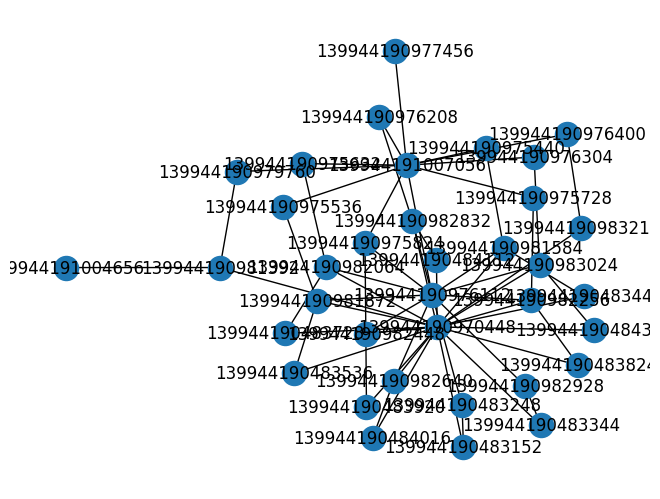

In [115]:
architecture.GraphManager.draw()

In [117]:
architecture.GraphManager.draw(engine='pyviz',params={'notebook':True})

ModelGraph.html


# Cost func
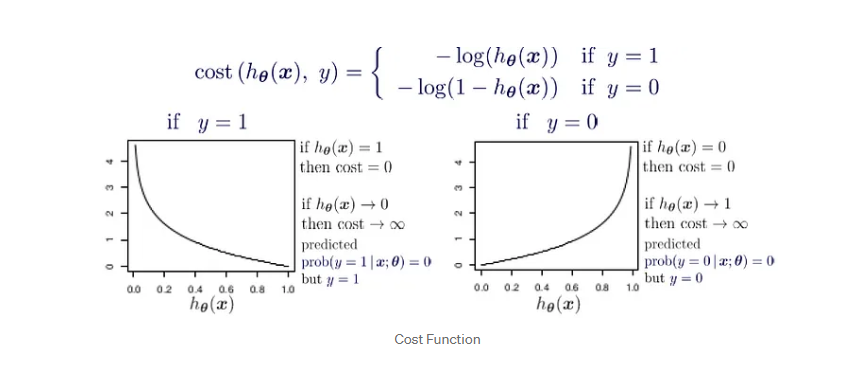

In [118]:
pred = network.predict(X)
pred

[(139944190976304,
  array([[0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
     

In [120]:
Cost = loss.binaryCrossEntropy(y,pred)
Cost

In [121]:
Cost.eval()

0.6931471805599453

In [122]:
Cost.prime()

array([[ 2.],
       [-2.],
       [-2.],
       [-2.],
       [-2.],
       [-2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [-2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [-2.],
       [-2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [-2.],
       [-2.],
       [ 2.],
       [ 2.],
       [-2.],
       [-2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [-2.],
       [-2.],
       [-2.],
       [-2.],
       [-2.],
       [-2.],
       [ 2.],
       [-2.],
       [-2.],
       [-2.],
       [-2.],
       [ 2.],
       [ 2.],
       [-2.],
       [-2.],
       [-2.],
       [-2.],
       [-2.],
       [-2.],
       [ 2.],
       [ 2.],
       [-2.],
       [-2.],
       [-2.],
       [-2.],
       [-2.],
       [-2.],
       [-2.],
       [-2.],
       [-2.],
       [ 2.],
       [-2.],
       [-2.],
       [ 2.],
       [ 2.],
       [-2.],
       [-2.],
       [-2.],
       [ 2.],
       [ 2.],
       [-2.],
       [-2.],
      

# Backpropagation

## Output Layer

In [127]:
network.steps[-1].outfuncs[0].outid

139944190976304

In [128]:
network.steps[-1].update({139944190976304:y})

{139944190981584: array([[0.  ],
        [0.25],
        [0.25],
        [0.25],
        [0.25],
        [0.25],
        [0.  ],
        [0.  ],
        [0.  ],
        [0.25],
        [0.  ],
        [0.  ],
        [0.  ],
        [0.  ],
        [0.  ],
        [0.25],
        [0.25],
        [0.  ],
        [0.  ],
        [0.  ],
        [0.25],
        [0.25],
        [0.  ],
        [0.  ],
        [0.25],
        [0.25],
        [0.  ],
        [0.  ],
        [0.  ],
        [0.25],
        [0.25],
        [0.25],
        [0.25],
        [0.25],
        [0.25],
        [0.  ],
        [0.25],
        [0.25],
        [0.25],
        [0.25],
        [0.  ],
        [0.  ],
        [0.25],
        [0.25],
        [0.25],
        [0.25],
        [0.25],
        [0.25],
        [0.  ],
        [0.  ],
        [0.25],
        [0.25],
        [0.25],
        [0.25],
        [0.25],
        [0.25],
        [0.25],
        [0.25],
        [0.25],
        [0.  ],
        [0.25],
       

In [130]:
Δ = network.steps[-1].update({139944190976304:y})

## Last Linear Layer

In [131]:
network.steps[-2]

In [132]:
len(network.steps[-2].In)

10

In [133]:
list(network.steps[-2].In.values())[0].shape

(300, 1)

In [134]:
network.steps[-2].In.values()

dict_values([array([[0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       

In [135]:
len(network.steps[-2].outfuncs)

1

In [136]:
Δ = network.steps[-2].update(Δ)
Δ

{139944190483344: array([[ 0.        ],
        [-0.02229167],
        [-0.02229167],
        [-0.02229167],
        [-0.02229167],
        [-0.02229167],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [-0.02229167],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [-0.02229167],
        [-0.02229167],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [-0.02229167],
        [-0.02229167],
        [ 0.        ],
        [ 0.        ],
        [-0.02229167],
        [-0.02229167],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [-0.02229167],
        [-0.02229167],
        [-0.02229167],
        [-0.02229167],
        [-0.02229167],
        [-0.02229167],
        [ 0.        ],
        [-0.02229167],
        [-0.02229167],
        [-0.02229167],
        [-0.02229167],
        [ 0.        ],
        [ 0.        ],
        [-0.02229

In [137]:
%%sql
SELECT * 
FROM
weights


 * sqlite:////home/analyst/notebooks/neural_net/run/model20240223130131.db
   sqlite:///network.db_path
Done.


id,weight_id,neuron_id,created_at,updated_at,value
1,0,139944266525968,2024-02-23 13:02:33,2024-02-23 13:02:33,0.0
2,1,139944266525968,2024-02-23 13:02:33,2024-02-23 13:02:33,0.0
3,2,139944266525968,2024-02-23 13:02:33,2024-02-23 13:02:33,0.0
4,0,139944266482704,2024-02-23 13:02:33,2024-02-23 13:02:33,0.0
5,1,139944266482704,2024-02-23 13:02:33,2024-02-23 13:02:33,0.0
6,2,139944266482704,2024-02-23 13:02:33,2024-02-23 13:02:33,0.0
7,0,139944190815824,2024-02-23 13:02:33,2024-02-23 13:02:33,0.0
8,1,139944190815824,2024-02-23 13:02:33,2024-02-23 13:02:33,0.0
9,2,139944190815824,2024-02-23 13:02:33,2024-02-23 13:02:33,0.0
10,0,139944190815952,2024-02-23 13:02:33,2024-02-23 13:02:33,0.0


## Update method

In [138]:
network.update({139944190976304:y})

In [139]:
%%sql
SELECT *
from weights

 * sqlite:////home/analyst/notebooks/neural_net/run/model20240223130131.db
   sqlite:///network.db_path
Done.


id,weight_id,neuron_id,created_at,updated_at,value
1,0,139944266525968,2024-02-23 13:02:33,2024-02-23 13:02:33,0.0
2,1,139944266525968,2024-02-23 13:02:33,2024-02-23 13:02:33,0.0
3,2,139944266525968,2024-02-23 13:02:33,2024-02-23 13:02:33,0.0
4,0,139944266482704,2024-02-23 13:02:33,2024-02-23 13:02:33,0.0
5,1,139944266482704,2024-02-23 13:02:33,2024-02-23 13:02:33,0.0
6,2,139944266482704,2024-02-23 13:02:33,2024-02-23 13:02:33,0.0
7,0,139944190815824,2024-02-23 13:02:33,2024-02-23 13:02:33,0.0
8,1,139944190815824,2024-02-23 13:02:33,2024-02-23 13:02:33,0.0
9,2,139944190815824,2024-02-23 13:02:33,2024-02-23 13:02:33,0.0
10,0,139944190815952,2024-02-23 13:02:33,2024-02-23 13:02:33,0.0


# Logistic Regression

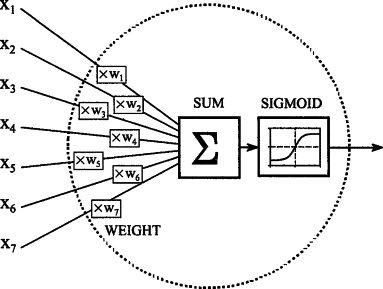

## Pure numpy definition

In [8]:
H_θ = lambda X,θ : 1/(1+numpy.exp(-X.dot(θ)))
θ = numpy.zeros((k,1))
H_θ(X,θ).shape

(300, 1)

## Using layers

In [9]:
LogReg = architecture.Sequential(
        [
        layers.fullyconnected(n_in=2,n_out=1),
        layers.activation(n_in=1,n_out=1,func=activation_funcs.σ)
        ],
    cost_func= loss.binaryCrossEntropy
    )
LogReg.predict(X)[0][1].shape

(300, 1)

## Computing Gradients

### Analytic gradient
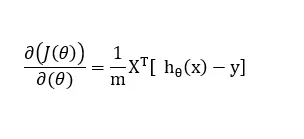

In [10]:
J = lambda θ : 1/n*X.T.dot(H_θ(X,θ)-y)
J(θ)

array([[0.16650187],
       [0.16109324]])

### Chain rule logistic Regression

In [155]:
%%HTML
  <iframe
      src="https://web.stanford.edu/class/archive/cs/cs109/cs109.1192/lectureNotes/25%20-%20LogisticRegression.pdf"
      width="100%"
      height="600px"
      loading="lazy"
      title="PDF-file"
  ></iframe>



In [167]:
p0 = LogReg.cost_func(y,LogReg.predict(X)).prime()
p1 = LogReg.steps[-1].update({LogReg.outid:p0})
p2 = LogReg.steps[-2].update(p1)
LogReg.steps[-2].outfuncs[0].w

array([[-0.15930924],
       [-0.15490416],
       [ 0.16666667]])

# Softmax Regression( k target items and j=1,..,n instances)

$$
{\displaystyle \sigma (\mathbf {z} )_{j}={\frac {\mathrm {e} ^{z_{j}}}{\sum _{k=1}^{K}\mathrm {e} ^{z_{k}}}}}
$$

## Analytical gradient

In [176]:
y_one_hot = utils.onehot(y)
y_one_hot

array([[0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [0,

In [177]:
W = numpy.zeros((X.shape[1]+1,2))
W

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

In [178]:
W = numpy.zeros((X.shape[1],2))
Softmax = lambda W,X : numpy.exp(X.dot(W))/numpy.exp(X.dot(W)).sum(axis=1).reshape(-1,1)
Softmax(W,X)

array([[0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5,

In [179]:
J = 1/len(X)*X.T.dot(Softmax(W,X)-y_one_hot)
J

array([[-0.15930924,  0.15930924],
       [-0.15490416,  0.15490416]])

### Chain rule

In [181]:
softmax = architecture.Sequential(
        [
        layers.fullyconnected(n_in=2,n_out=2),
        layers.activation(n_in=2,n_out=1,func=activation_funcs.Softmax)
        ],
    cost_func= loss.CrossEntropy
    )

In [182]:
grad0 = softmax.cost_func(y_one_hot, softmax.eval(X)).prime()
grad0.shape

(300, 2)

In [183]:
grad1 = softmax.steps[-1].update({softmax.outid:grad0})

In [184]:
grad2 = softmax.steps[-2].update(grad1)

In [186]:
softmax.steps[-2].outfuncs[0].w

array([[ 0.15930924],
       [ 0.15490416],
       [-0.16666667]])

In [187]:
softmax.steps[-2].outfuncs[1].w

array([[-0.15930924],
       [-0.15490416],
       [ 0.16666667]])

# Training

In [11]:
n_epoch = 1000
α = 0.1

## Logistic Regression

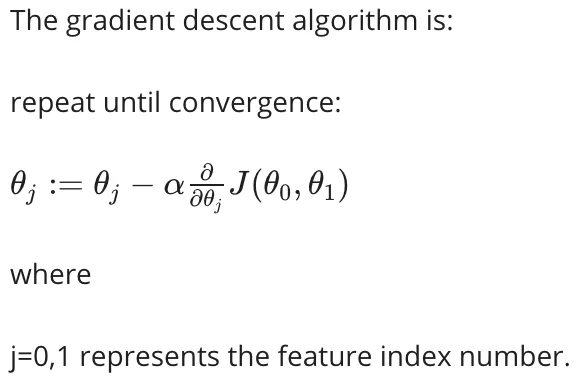

### Using analytical gradient

In [12]:
for _ in range(n_epoch):
    θ -= α*J(θ)

In [13]:
θ

array([[-3.43249863],
       [-3.52608663]])

In [14]:
pred = (H_θ(X,θ) > .5 )+0

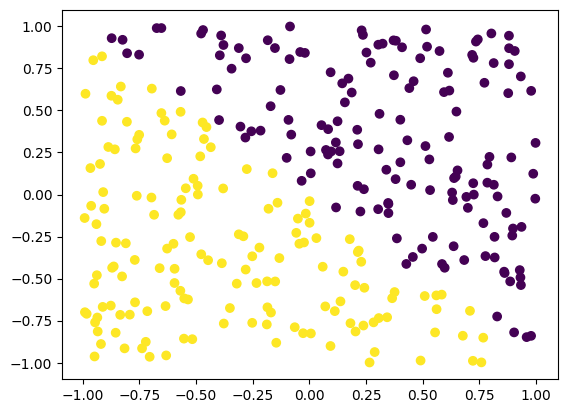

In [15]:
plt.scatter(x=X[:,0],y=X[:,1],c=pred)

### Using chain rule

In [222]:
LogReg = architecture.Sequential(
        [
        layers.fullyconnected(n_in=2,n_out=1),
        layers.activation(n_in=1,n_out=1,func=activation_funcs.σ)
        ],
    cost_func= loss.binaryCrossEntropy
    )
for _ in range(n_epoch):
    grad0 = LogReg.cost_func(y,LogReg.eval(X)).prime()
    grad1 = LogReg.steps[-1].update({LogReg.outid:grad0})
    grad2 = LogReg.steps[-2].update(grad1)

In [223]:
LogReg.steps[-2].outfuncs[0].w

array([[-9.55284204],
       [-9.51711004],
       [ 3.24727624]])

In [224]:
_,p = LogReg.eval(X)[0]

In [225]:
p = (p>.5)+0

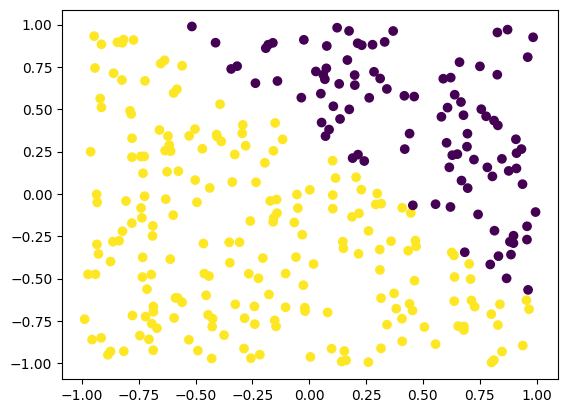

In [226]:
plt.scatter(x=X[:,0],y=X[:,1],c=p)

### Using train method

In [229]:
LogReg = architecture.Sequential(
        [
        layers.fullyconnected(n_in=2,n_out=1),
        layers.activation(n_in=1,n_out=1,func=activation_funcs.σ)
        ],
    cost_func= loss.binaryCrossEntropy
    )
LogReg.train(X,y,n_epochs=n_epoch)

In [230]:
LogReg.steps[-2].outfuncs[0].w

array([[-9.55284204],
       [-9.51711004],
       [ 3.24727624]])

## Softmax

### Using Softmax analytical solution

In [231]:
k=2
W = numpy.zeros((X.shape[1],k))
Softmax = lambda W,X : numpy.exp(X.dot(W))/numpy.exp(X.dot(W)).sum(axis=1).reshape(-1,1)
J_W = lambda W,X : 1/n*X.T.dot(Softmax(W,X)-y_one_hot)

for _ in range(n_epoch):
    W -= α*J_W(W,X) 

In [232]:
W

array([[ 2.07176793, -2.07176793],
       [ 2.1469769 , -2.1469769 ]])

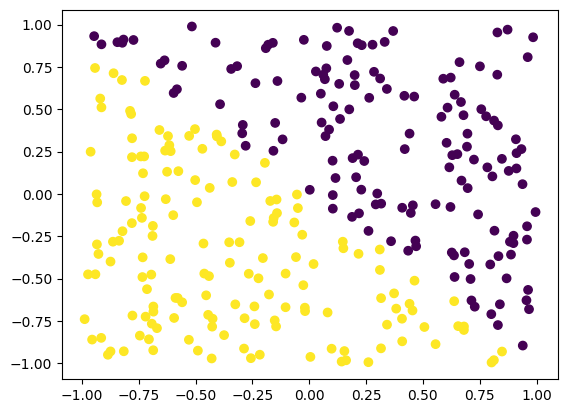

In [234]:
p = Softmax(W,X).argmax(axis=1)
plt.scatter(x=X[:,0],y=X[:,1],c=p)

### Chain rule

In [235]:
softmax = architecture.Sequential(
        [
        layers.fullyconnected(n_in=2,n_out=2),
        layers.activation(n_in=2,n_out=1,func=activation_funcs.Softmax)
        ],
    cost_func= loss.CrossEntropy
    )

In [236]:
for _ in range(n_epoch):
    grad0 = softmax.cost_func(y_one_hot,softmax.eval(X)).prime()
    grad1 = softmax.steps[-1].update({softmax.outid:grad0})
    grad2 = softmax.steps[-2].update(grad1)

In [237]:
softmax.steps[-2].outfuncs[0].w

array([[ 6.05844646],
       [ 6.03660202],
       [-2.03310745]])

In [238]:
softmax.steps[-2].outfuncs[1].w

array([[-6.05844646],
       [-6.03660202],
       [ 2.03310745]])

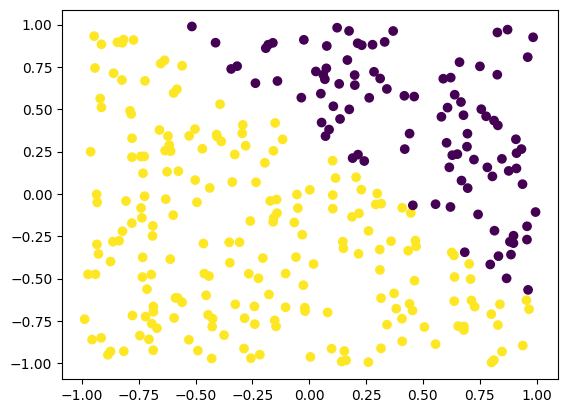

In [239]:
p = softmax.eval(X)[0][1].argmax(axis=1)
plt.scatter(x=X[:,0],y=X[:,1],c=p)

# Generating Non linear data

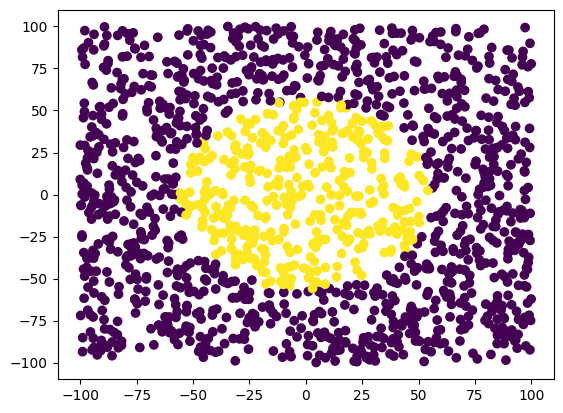

In [44]:
n,k = 1500,2
X = numpy.random.uniform(-100,100,size=(n,k))
y =( (X[:, 0]**2 + X[:, 1]**2)/numpy.pi < 1000).reshape(-1,1)+0
y_one_hot = utils.onehot(y)
plt.scatter(x=X[:,0],y=X[:,1],c=y)

# Beyond linear architecture

## Logistic regression

In [29]:
H_θ = lambda X,θ : 1/(1+numpy.exp(-X.dot(θ)))
θ = numpy.zeros((k,1))
for _ in range(20000):
    θ -= α*J(θ)

In [30]:
p = H_θ(X,θ)

In [31]:
y.shape

(1500, 1)

In [36]:
((p>.5 )==y).sum()/len(y)

0.5073333333333333

## Softmax

In [37]:
k=2
W = numpy.zeros((X.shape[1],k))
Softmax = lambda W,X : numpy.exp(X.dot(W))/numpy.exp(X.dot(W)).sum(axis=1).reshape(-1,1)
J_W = lambda W,X : 1/n*X.T.dot(Softmax(W,X)-y_one_hot)

for _ in range(20000):
    W -= α*J_W(W,X) 

In [45]:
p = Softmax(W,X).argmax(axis=1).reshape(-1,1)
(p==y).sum()/len(y)

0.5073333333333333

# Neural network

## Xavier and He Initialization methods

We don’t want the signal to die out, nor do we want it to explode and saturate.

For the signal to flow properly, the authors argue that we need the variance of the outputs of each layer to be equal to the variance of its inputs

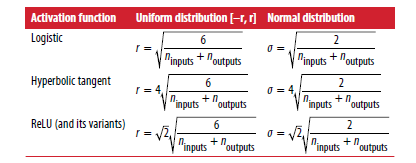

In [8]:
ann = architecture.Sequential(
        [
        layers.fullyconnected(n_in=2,n_out=10,init_method=init_funcs.XHReluuniform),
        layers.activation(n_in=10,n_out=10,func=activation_funcs.LeakyReLU),
        
            
        layers.fullyconnected(n_in=10,n_out=2,init_method=init_funcs.XHReluuniform),
        layers.activation(n_in=2,n_out=1,func=activation_funcs.Softmax)
        ],
    cost_func= loss.CrossEntropy
    )

In [9]:
ann.train(
    utils.scaler(X),
        utils.onehot(y),n_epochs=100,batch_size=700, α=.3,metrics=metrics.accuracy)

epoch 0 CrossEntropy 0.6263367917665422 accuracy 0.58
epoch 1 CrossEntropy 0.5558926088444918 accuracy 0.69
epoch 2 CrossEntropy 0.5229819177270822 accuracy 0.69
epoch 3 CrossEntropy 0.5024024551663185 accuracy 0.69
epoch 4 CrossEntropy 0.48868478703558227 accuracy 0.69
epoch 5 CrossEntropy 0.47852912777436507 accuracy 0.69
epoch 6 CrossEntropy 0.470602289103134 accuracy 0.69
epoch 7 CrossEntropy 0.4636703237144171 accuracy 0.69
epoch 8 CrossEntropy 0.45746532311344995 accuracy 0.69
epoch 9 CrossEntropy 0.45166875805173007 accuracy 0.69
epoch 10 CrossEntropy 0.44604332012348524 accuracy 0.69
epoch 11 CrossEntropy 0.4405378872675416 accuracy 0.69
epoch 12 CrossEntropy 0.43514158779537 accuracy 0.69
epoch 13 CrossEntropy 0.4298938576561706 accuracy 0.69
epoch 14 CrossEntropy 0.42462159460849686 accuracy 0.7
epoch 15 CrossEntropy 0.41941356819084513 accuracy 0.71
epoch 16 CrossEntropy 0.4143304855140617 accuracy 0.71
epoch 17 CrossEntropy 0.4092633249143428 accuracy 0.72
epoch 18 CrossEnt

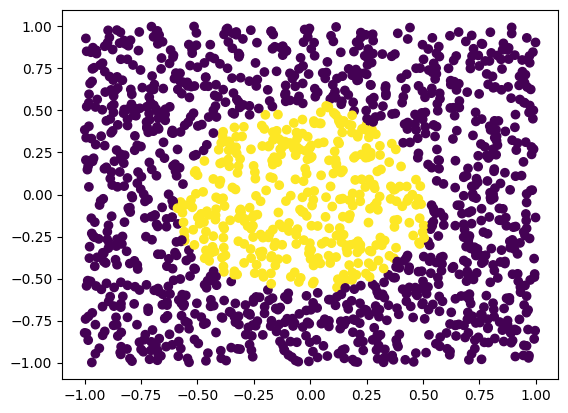

In [26]:
p = ann.eval(utils.scaler(X))[0][1].argmax(axis=1)
plt.scatter(x=X[:,0],y=X[:,1],c=p)

In [11]:
ann.train(
    utils.scaler(X),
        utils.onehot(y),n_epochs=30,batch_size=300, α=.3,metrics=metrics.accuracy)

epoch 0 CrossEntropy 0.1471275362172014 accuracy 0.9666666666666667
epoch 1 CrossEntropy 0.14574563942902616 accuracy 0.9633333333333334
epoch 2 CrossEntropy 0.144358699392034 accuracy 0.9633333333333334
epoch 3 CrossEntropy 0.14297590963621493 accuracy 0.9633333333333334
epoch 4 CrossEntropy 0.14164135751757798 accuracy 0.9633333333333334
epoch 5 CrossEntropy 0.14036326691219664 accuracy 0.9633333333333334
epoch 6 CrossEntropy 0.13909978358509914 accuracy 0.9633333333333334
epoch 7 CrossEntropy 0.13784900363607255 accuracy 0.9633333333333334
epoch 8 CrossEntropy 0.136646084953861 accuracy 0.96
epoch 9 CrossEntropy 0.13546284506594267 accuracy 0.96
epoch 10 CrossEntropy 0.13430244013552245 accuracy 0.96
epoch 11 CrossEntropy 0.13316798082322415 accuracy 0.96
epoch 12 CrossEntropy 0.13204950497797158 accuracy 0.9633333333333334
epoch 13 CrossEntropy 0.13096885926202456 accuracy 0.9633333333333334
epoch 14 CrossEntropy 0.12990821194605615 accuracy 0.9633333333333334
epoch 15 CrossEntropy

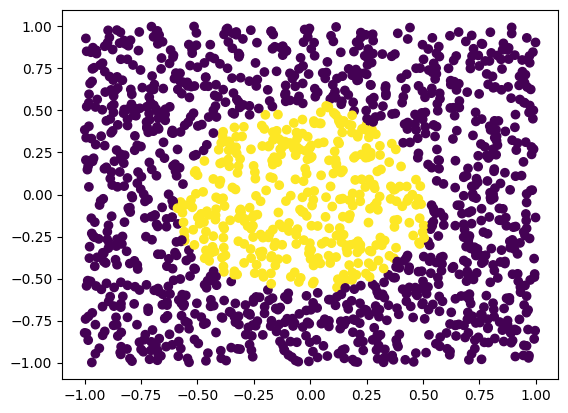

In [25]:
p = ann.eval(utils.scaler(X))[0][1].argmax(axis=1)
plt.scatter(x=X[:,0],y=X[:,1],c=p)

In [13]:
ann.train(
    utils.scaler(X),
        utils.onehot(y),n_epochs=50, α=.3,metrics=metrics.accuracy)

epoch 0 CrossEntropy 0.1208973718526618 accuracy 0.97
epoch 1 CrossEntropy 0.12073486177856503 accuracy 0.97
epoch 2 CrossEntropy 0.12057563296655799 accuracy 0.97
epoch 3 CrossEntropy 0.12041847144775701 accuracy 0.97
epoch 4 CrossEntropy 0.12026268072982155 accuracy 0.97
epoch 5 CrossEntropy 0.12010718522324064 accuracy 0.9706666666666667
epoch 6 CrossEntropy 0.11995285916453356 accuracy 0.9706666666666667
epoch 7 CrossEntropy 0.11979997244418837 accuracy 0.9706666666666667
epoch 8 CrossEntropy 0.11964786256025134 accuracy 0.9706666666666667
epoch 9 CrossEntropy 0.11949650165775962 accuracy 0.9706666666666667
epoch 10 CrossEntropy 0.119346800556277 accuracy 0.9706666666666667
epoch 11 CrossEntropy 0.11919777971593543 accuracy 0.9706666666666667
epoch 12 CrossEntropy 0.11904948430802118 accuracy 0.9706666666666667
epoch 13 CrossEntropy 0.11890245579841974 accuracy 0.9706666666666667
epoch 14 CrossEntropy 0.11875557360216986 accuracy 0.9706666666666667
epoch 15 CrossEntropy 0.118609902

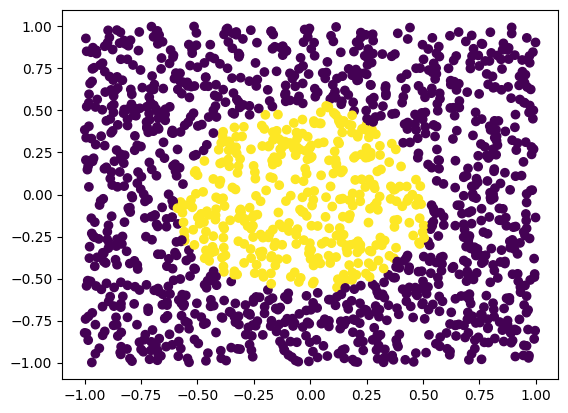

In [24]:
p = ann.eval(utils.scaler(X))[0][1].argmax(axis=1)
plt.scatter(x=X[:,0],y=X[:,1],c=p)

In [16]:
ann.train(
    utils.scaler(X),
        utils.onehot(y),n_epochs=1000, α=1,metrics=metrics.accuracy)

epoch 0 CrossEntropy 0.08302584790345359 accuracy 0.9793333333333333
epoch 1 CrossEntropy 0.08287116716587514 accuracy 0.9793333333333333
epoch 2 CrossEntropy 0.08271760986584309 accuracy 0.9793333333333333
epoch 3 CrossEntropy 0.08256506516250676 accuracy 0.9793333333333333
epoch 4 CrossEntropy 0.08241371524808148 accuracy 0.9793333333333333
epoch 5 CrossEntropy 0.08226338647747691 accuracy 0.9793333333333333
epoch 6 CrossEntropy 0.08211384825207513 accuracy 0.98
epoch 7 CrossEntropy 0.08196547680120722 accuracy 0.98
epoch 8 CrossEntropy 0.08181672276635309 accuracy 0.98
epoch 9 CrossEntropy 0.08166935814152901 accuracy 0.98
epoch 10 CrossEntropy 0.08152301033605758 accuracy 0.98
epoch 11 CrossEntropy 0.08137754379093991 accuracy 0.98
epoch 12 CrossEntropy 0.08123314011490265 accuracy 0.9813333333333333
epoch 13 CrossEntropy 0.08108904769906633 accuracy 0.9813333333333333
epoch 14 CrossEntropy 0.0809458335102 accuracy 0.9813333333333333
epoch 15 CrossEntropy 0.08080250814249626 accura

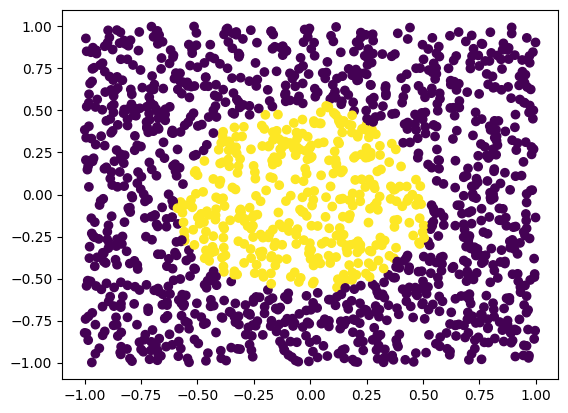

In [23]:
p = ann.eval(utils.scaler(X))[0][1].argmax(axis=1)
plt.scatter(x=X[:,0],y=X[:,1],c=p)

In [27]:
(p.reshape(-1,1) == y).sum()/len(y)

0.9706666666666667

# Optical character recognition(OCR)
Hand written digits

In [66]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,ConfusionMatrixDisplay

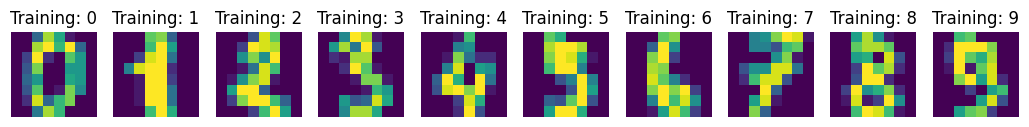

In [40]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=10, figsize=(13, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image)
    ax.set_title("Training: %i" % label)

In [49]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target.reshape(-1,1), test_size=0.5, shuffle=False
)

In [50]:
X_train.shape,y_train.shape

((898, 64), (898, 1))

In [77]:
k=10
W = numpy.zeros((X_train.shape[1],k))
Softmax = lambda W,X : numpy.exp(X.dot(W))/numpy.exp(X.dot(W)).sum(axis=1).reshape(-1,1)
J_W = lambda W,X : 1/n*X.T.dot(Softmax(W,X)-utils.onehot(y_train))

for _ in range(20000):
    W -= .1*J_W(W,X_train) 

In [78]:
predicted = Softmax(W,X_test).argmax(axis=1)

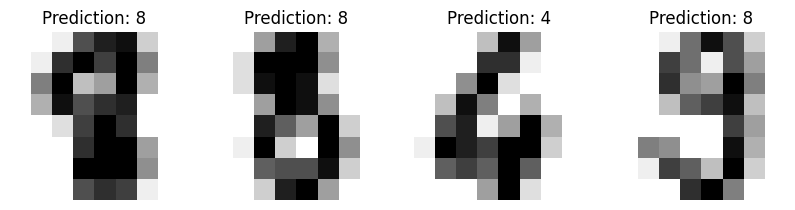

In [79]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

In [80]:
print(
    f"Classification report for classifier :\n"
    f"{classification_report(y_test, predicted)}\n"
)

Classification report for classifier :
              precision    recall  f1-score   support

           0       0.99      0.95      0.97        88
           1       0.94      0.90      0.92        91
           2       1.00      0.98      0.99        86
           3       0.94      0.85      0.89        91
           4       0.98      0.89      0.93        92
           5       0.89      0.95      0.91        91
           6       0.89      0.99      0.94        91
           7       0.97      0.94      0.95        89
           8       0.90      0.92      0.91        88
           9       0.83      0.92      0.88        92

    accuracy                           0.93       899
   macro avg       0.93      0.93      0.93       899
weighted avg       0.93      0.93      0.93       899




Confusion matrix:
[[84  0  0  0  1  0  3  0  0  0]
 [ 0 82  0  1  0  1  1  0  1  5]
 [ 0  0 84  2  0  0  0  0  0  0]
 [ 0  0  0 77  0  4  0  2  7  1]
 [ 0  0  0  0 82  0  6  0  0  4]
 [ 0  1  0  0  0 86  1  0  0  3]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  1  1  0 84  0  3]
 [ 0  3  0  0  0  3  0  0 81  1]
 [ 1  0  0  2  0  2  0  1  1 85]]


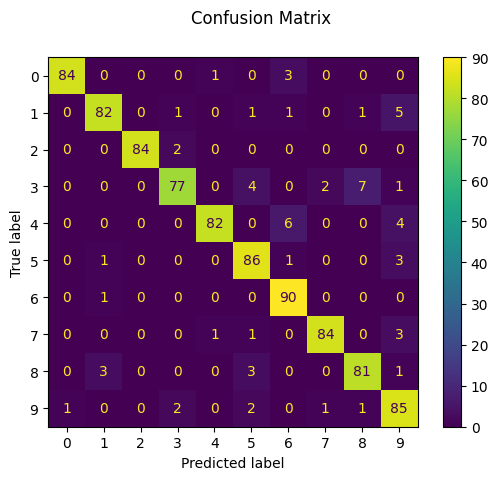

In [81]:
disp = ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()